# Forest Cover Type

### Each group should show their results (summary charts) concerning the topics listed for each week for the 1st dataset in the project, at their lab. Evaluation points:
- Week 3 (Sep 30th) - Univariate analysis
- Week 4 (Oct 7th) - Multivariate analysis
- Week 5 (Oct 14th) - Naive Bayes and KNN
- Week 6 (Oct 21st) - Decision trees
- Week 7 (Oct 28th) - Ensembles
- Week 8 (Nov 4th) - Pattern Mining
- Week 9 (Nov 11th) - Clustering
#### The evaluations on the last  three labs will cover the topics exercised during the class:
- Week 11 (Nov 25th) - Regression
- Week 12 (Dec 2nd) - Time series data analysis
- Week 13 (Dec 9th) - Forecasting
- Extra mark - Biclustering ( if you miss any previous point) 

In [206]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Column names extracted from the dataset description file
cols = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
         "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
         "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
         "Horizontal_Distance_To_Fire_Points"] + \
       ["Wilderness_Area_{}".format(i) for i in range(4)] + \
       ["Soil_Type {}".format(i) for i in range(40)] + \
       ["Cover_Type"]

#import data Forest Cover Type
data = pd.read_csv("dataset/covtype.data", index_col=None, names=cols)

# Forest Cover Type Classes      1 -- Spruce/Fir
#                                2 -- Lodgepole Pine
#                                3 -- Ponderosa Pine
#                                4 -- Cottonwood/Willow
#                                5 -- Aspen
#                                6 -- Douglas-fir
#                                7 -- Krummholz

## 1. Statistical description (5%)
The students should perform a statistical analysis of the datasets in advance and summarize relevant
implications in the report, such as the underlying distributions and hypothesized forms feature dependency.

In [207]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [208]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [209]:
data.shape

(581012, 55)

In [210]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_0                     int64
Wilderness_Area_1                     int64
Wilderness_Area_2                     int64
Wilderness_Area_3                     int64
Soil_Type 0                           int64
Soil_Type 1                           int64
Soil_Type 2                           int64
Soil_Type 3                           int64
Soil_Type 4                           int64
Soil_Type 5                           int64
Soil_Type 6                           int64
Soil_Type 7                           int64
Soil_Type 8                     

### The dataset is tabular with high amount of records and 53 variables, plus one class variable. Wilderness_Area and Soil_Type are binary variables. All variables are int64. The class variable has a value from 1 to 7, each corresponding with a type of forest cover type: 

1 -- Spruce/Fir
2 -- Lodgepole Pine
3 -- Ponderosa Pine
4 -- Cottonwood/Willow
5 -- Aspen
6 -- Douglas-fir
7 -- Krummholz



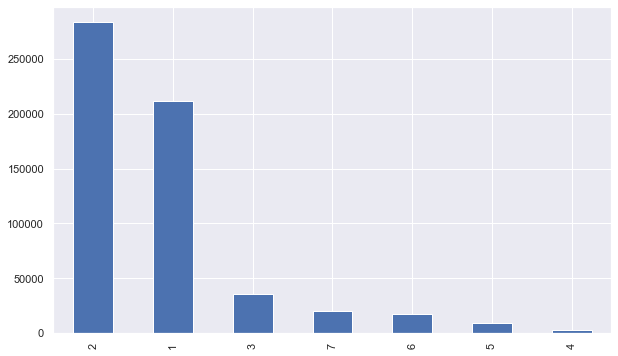

In [211]:
#distribution of classes
data['Cover_Type'].value_counts().plot(kind='bar')

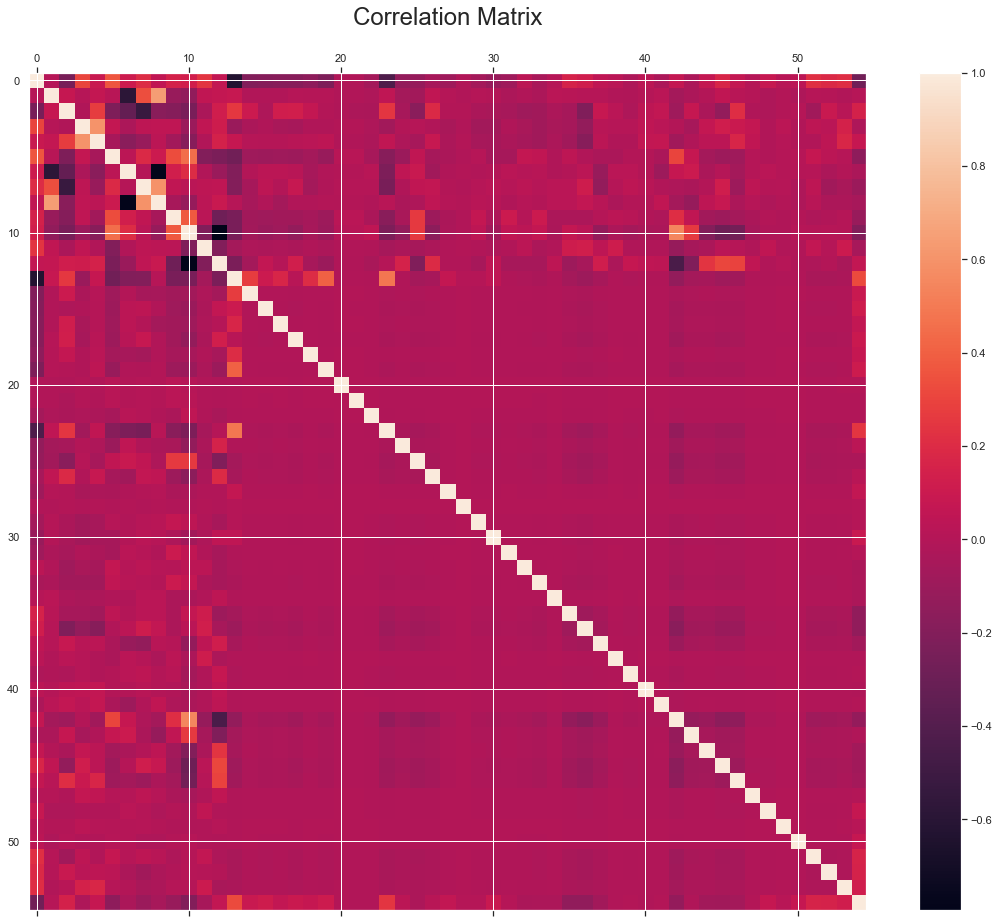

In [212]:
#heatmap with correlation
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=24);

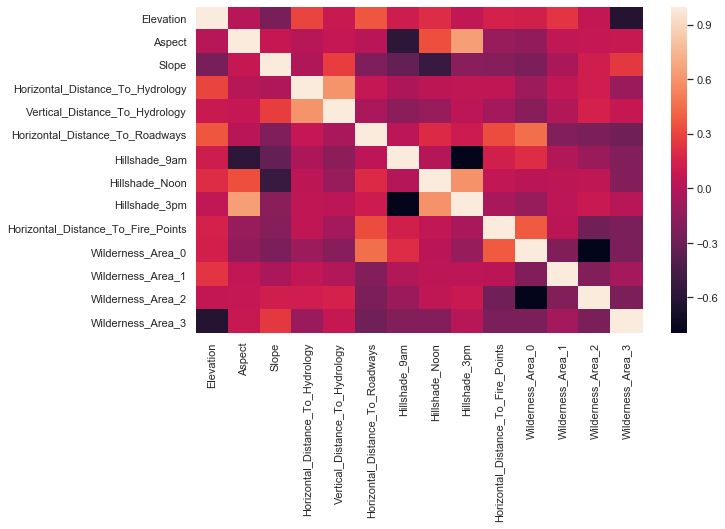

In [213]:
#look at heatmap of first 10 variables
Sdata = data.iloc[:,0:14]
corr = Sdata.corr()
sns.heatmap(corr)

<Figure size 720x432 with 0 Axes>

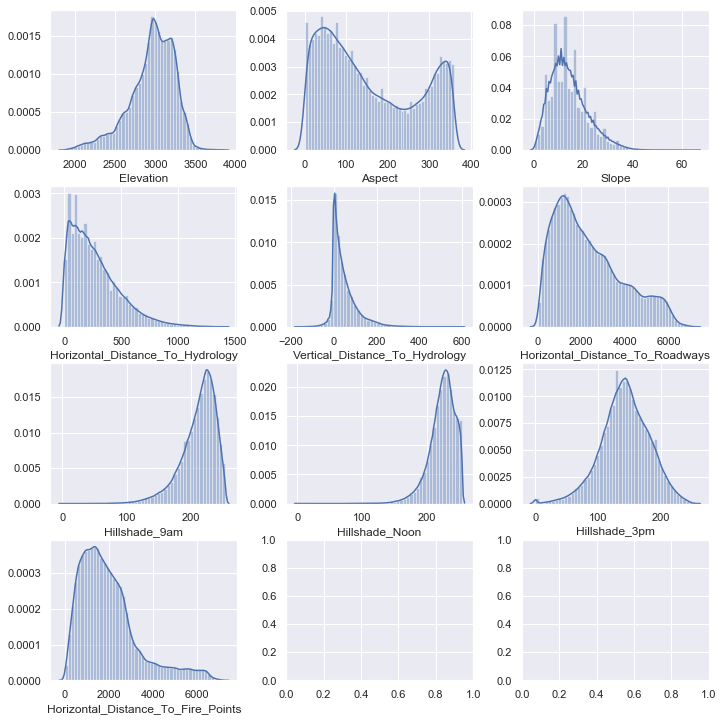

In [214]:
#look at distribution of first 10 variables
from pylab import *

plt.figure()
fig, axs = plt.subplots(4,3, figsize=(10, 10), squeeze=False)
fig.tight_layout()

subplot(4,3,1)
sns.distplot(data['Elevation'])

subplot(4,3,2)
sns.distplot(data['Aspect'])

subplot(4,3,3)
sns.distplot(data['Slope'])

subplot(4,3,4)
sns.distplot(data['Horizontal_Distance_To_Hydrology'])

subplot(4,3,5)
sns.distplot(data['Vertical_Distance_To_Hydrology'])

subplot(4,3,6)
sns.distplot(data['Horizontal_Distance_To_Roadways'])

subplot(4,3,7)
sns.distplot(data['Hillshade_9am'])

subplot(4,3,8)
sns.distplot(data['Hillshade_Noon'])

subplot(4,3,9)
sns.distplot(data['Hillshade_3pm'])

subplot(4,3,10)
sns.distplot(data['Horizontal_Distance_To_Fire_Points'])

## The amount of instances classified as 1 and 2 are significantly higher than the rest of the classes. 

## From the heatmap can be seen that only the first 10 variables are interesting to look at. When taking a closer look some variables are highly negatively correlated.

## Looking at the distribution of the frist 10 variables tells us that there are the Aspects are widely spread but the distribution of all other variables peaks at a certain point.

## 2. Preprocessing (20%)
In accordance with the properties of the input dataset and the behavior of the target learning algorithm,
the students are allowed to apply preprocessing techniques when needed or under a solid conjecture of its
potential impact on learning. 

In [215]:
#check missing values
data.isna().sum().sum()

0

# Need to over/under sample data to get more even distribution


In [36]:
data.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [216]:
# Subsample all classes to 10k
class_size= 10000

BData = data.groupby("Cover_Type").apply(lambda x: x.sample(min(class_size, len(x)))).reset_index(1)
#BData = BData.drop(columns=["Cover_Type"]).reset_index().drop(columns=["level_1"])

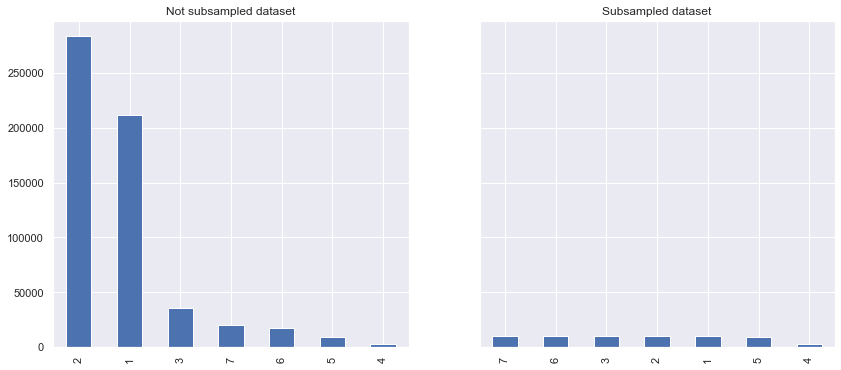

In [217]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,6))
data.Cover_Type.value_counts().plot(kind="bar", ax=ax1, title="Not subsampled dataset")
BData.Cover_Type.value_counts().plot(kind="bar", ax=ax2, title="Subsampled dataset")
plt.show()

## 3. Unsupervised
### a. Association Rules (7.5%)
### b.Clustering (7.5%)
Unsupervised exploration must be done through clustering and association rule mining. Class attributes
should not be used to explore the data, unless there is a well substantiated interest for mining classconditional data or discovering association rules with classes in the antecedent/consequent. Nevertheless,
class attributes may be used to objectively assess clustering results and evaluate the discriminative power
of certain association rules. Besides this, statistical evaluation must be performed using the studied indexes.

## 4. Classification
### a. Naïve Bayes (2%)
### b. Instance-based Learning (3%)
### c. Decision Trees (5%)
### d.Random Forests (5%)
### e. XGBoost (5%)
Supervised exploration must be done via the application of kNN, Naïve Bayes, Decision Trees, Random
Forests and XGBoost. For this purpose, the use of class attributes is mandatory. Evaluation of the obtained
models should be done as usual, through accuracy measures and evaluation charts, as studied in the classes.
A thorough comparison of the adequacy of the models should be present taking into consideration the
adequacy of their behavior against the properties of each dataset and their observed performance.

In [105]:
BData.dtypes

level_1                               int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_0                     int64
Wilderness_Area_1                     int64
Wilderness_Area_2                     int64
Wilderness_Area_3                     int64
Soil_Type 0                           int64
Soil_Type 1                           int64
Soil_Type 2                           int64
Soil_Type 3                           int64
Soil_Type 4                           int64
Soil_Type 5                           int64
Soil_Type 6                           int64
Soil_Type 7                     

In [218]:
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

y: np.ndarray = BData.pop('Cover_Type').values
X: np.ndarray = BData.values
labels = pd.unique(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
labels = pd.unique(y)

# Naive Bayes

In [112]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
cnf_mtx_Gauss = metrics.confusion_matrix(y_test, y_pred, labels)
print(cnf_mtx_Gauss)
print(gauss.score(X_train, y_train))

[[ 867  210    3    0  100   14  307]
 [ 389  512   43    0  330  100   67]
 [   0   42  797   67  146  523    0]
 [   0    0   35  328    0   41    0]
 [   0  316   11    0  982  113    0]
 [   0   57  359   65  122  896    0]
 [ 277    4    0    0    3    0 1210]]
0.6019393618629971


In [114]:
bern = BernoulliNB()
bern.fit(X_train, y_train)
y_pred = bern.predict(X_test)
cnf_mtx_Bern = metrics.confusion_matrix(y_test, y_pred, labels)
print(cnf_mtx_Bern)
print(bern.score(X_train,y_train))

[[ 570  572    0    0  174    9  176]
 [ 253  734   30    1  344   64   15]
 [   0    3  865  104   96  507    0]
 [   0    0   60  324    0   20    0]
 [ 126  309  111    0  823   53    0]
 [  18   74  388   63  165  791    0]
 [  79  158    7    0   42    0 1208]]
0.5806744291546952


# KNN

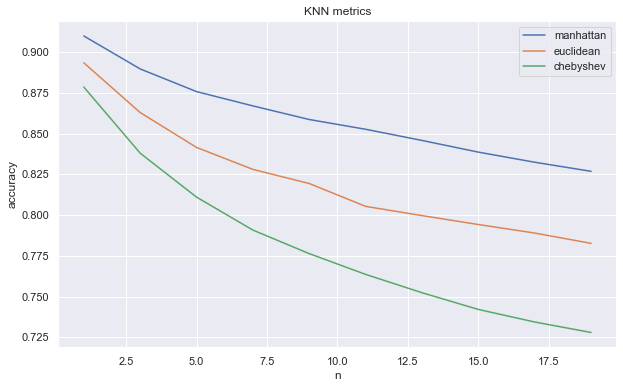

In [142]:
from sklearn.neighbors import KNeighborsClassifier

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        yvalues.append(metrics.accuracy_score(y_test, y_pred))
    values[d] = yvalues
    plt.plot(nvalues, values[d])
    plt.title('KNN metrics')
    plt.xlabel('n')
    plt.ylabel('accuracy')
    plt.legend(dist)
plt.show()

 Manhatten distance gives best accurcy by low number of n

In [191]:
knn = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cnf_mtx_knn = metrics.confusion_matrix(y_test, y_pred, labels)
print(cnf_mtx_knn)
print(knn.score(X_train, y_train))        

[[1266  106    6    1   35    7   80]
 [ 249 1013   34    0   96   26   23]
 [   0    5 1426   24   18  102    0]
 [   0    0   41  352    0   11    0]
 [   2   12   13    0 1391    4    0]
 [   1    4  112   20   23 1339    0]
 [  17    2    0    0    2    0 1473]]
0.9389838197489793


# Decision Trees

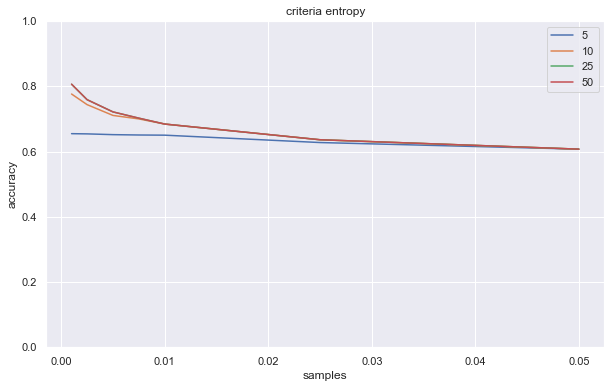

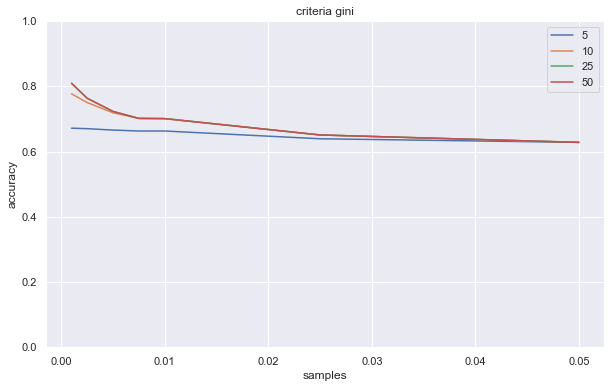

In [220]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

 
min_samples_leaf = [.05, .025, .01, .0075, .005, .0025, .001]
max_depths = [5, 10, 25, 50]
criteria = ['entropy', 'gini']



for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for n in min_samples_leaf:
            dt = tree.DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f)
            dt.fit(X_train, y_train)
            y_pred = dt.predict(X_test)
            yvalues.append(metrics.accuracy_score(y_test, y_pred))
        values[d] = yvalues
        plt.plot(min_samples_leaf, values[d])
        plt.title('criteria %s'%f)
        plt.xlabel('samples')
        plt.ylim((0,1))
        plt.ylabel('accuracy')
        plt.legend(max_depths)
    plt.show()

In [221]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=0.02)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
cnf_mtx_dt = metrics.confusion_matrix(y_test, y_pred, labels)
print(cnf_mtx_dt)
print(dt.score(X_train, y_train)) 

[[ 835  187    8    0  113    5  307]
 [ 382  622   60    0  415   44   56]
 [   0   53 1041   39   60  278    0]
 [   0   11   95  342    0    2    0]
 [  12  169   52    0 1153   24    0]
 [   0  103  514   64  105  659    0]
 [ 179    4    0    0    4    0 1339]]
0.641841826704975


In [262]:
from sklearn.tree import export_graphviz
import pydotplus
import io
from io import BytesIO as StringIO
from IPython.display import Image

dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=0.02)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


dotfile = StringIO()
tree.export_graphviz(dt, out_file="graph.dot")
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
#graph.write_png("dtree.png")
#graph.create_png("dtree.png") 
Image(graph.create_png())


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


AttributeError: 'NoneType' object has no attribute 'create_png'

# Random Forest (ensemble)

# 5. Evaluation and critical analysis (30%)
A project that applies the suggested data mining techniques over the given datasets and provides a clear
and sound analysis of the collected results is not necessarily an excelling project.
Excelling projects have four major characteristics.
First, they show an acute understanding of the data characteristics and their impact on the learning.
Excelling projects formulate hypothesis behind differences in performance.
Second, they have precise and succinct language: no redundancies, unnecessary or subjective statements.
Third, excelling projects are often a result of a creative thinking on ways of improving the learning.
Illustrating, the justified use of a specific preprocessing technique (whether the inclusion of new features,
space transformations, handling of outliers or specific forms of noise) can make a difference.
Fourth, robust assessments go beyond simple performance indicators. Excelling projects draw (parametervarying) plots, test hypotheses, and establish ratios to understand less-trivial performance views such as
robustness to noise, domain adequacy or overfitting propensity.